# EDA : Exploratory Data Analysis


#   <center> Mental Health Analysis</center>                                             

## **Table of Contents**

1. [**Problem Statement**](#section1)<br>
2. [**Importing Packages**](#section2)<br>
3. [**Loading Data**](#section3)<br>
4. [**Description of the Dataset**](#section401)<br>
5. [**Exploratory Data Analysis**](#section6)<br>
6. [**Conclusion**](#section7)<br>

<a id=section1></a>

---
# **1. Problem Statement**
---


## Basic Analytical Questions:

### Demographic Distribution:

What is the distribution of age groups in the dataset?
What is the gender distribution in the dataset?
What are the most common occupations in the dataset?

### Quarantine and Lifestyle Changes:

How many days, on average, did people spend indoors?
What percentage of respondents reported growing stress due to quarantine?
How many respondents reported changes in their habits during quarantine?

### Mental Health and Mood:

What percentage of respondents have a history of mental health issues?
How many respondents experienced weight changes during quarantine?
What is the distribution of mood swings among respondents?

## Complex Analytical Questions:

### Correlation Analysis:

Is there a correlation between the number of days spent indoors and growing stress levels?
How does the occupation of respondents relate to their mental health history?
Is there a relationship between age groups and weight change?

### Group Comparisons:

Compare the mental health history between males and females. Are there significant differences?
How do mood swings vary across different occupations?
Analyze the stress levels among different age groups.

### Impact of Quarantine:

How does the duration of time spent indoors affect quarantine frustrations and changes in habits?
What is the impact of quarantine on mental health across different demographic groups?
Investigate the relationship between quarantine frustrations and mood swings.

### Predictive Analysis:

What factors contribute most to growing stress during quarantine?



<a id=section2></a>

---
# **2. Importing Libraries**
---

In [29]:

                 
#--------------------------------------------------------------------------------
import pandas as pd
  
#--------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns            

#-------------------------------------------------------------------------------------------------------------------------------

<a id=section3></a>

---
# **3. Loading Data**
---

In [10]:
import pandas as pd
data= pd.read_csv("C:/mental_health_finaldata_1.csv")
data

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
0,20-25,Female,Corporate,1-14 days,Yes,Yes,No,Yes,Yes,Medium,No,No,Yes
1,30-Above,Male,Others,31-60 days,Yes,Yes,Maybe,No,No,High,No,No,Yes
2,30-Above,Female,Student,Go out Every day,No,No,Yes,No,No,Medium,Yes,Maybe,No
3,25-30,Male,Others,1-14 days,Yes,No,Maybe,No,Maybe,Medium,No,Maybe,Yes
4,16-20,Female,Student,More than 2 months,Yes,Yes,Yes,No,Yes,Medium,Yes,Maybe,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,20-25,Male,Corporate,Go out Every day,No,Yes,No,Yes,Yes,Medium,No,Yes,Maybe
820,20-25,Male,Others,1-14 days,Yes,Yes,No,Yes,Maybe,Low,No,Maybe,Maybe
821,20-25,Male,Student,More than 2 months,Yes,Maybe,Maybe,No,Yes,High,Yes,Yes,Maybe
822,16-20,Male,Business,15-30 days,No,No,Maybe,No,Maybe,Low,Yes,No,Maybe


<a id=section4></a>

---
# **4. Data Description**
---

<br>

In [27]:
data.describe()

,Days_indoors_numeric
count,824.000000
mean,29.484223
std,27.298489
min,0.000000
25%,7.000000
50%,22.000000
75%,45.000000
max,75.000000


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      824 non-null    object
 1   Gender                   824 non-null    object
 2   Occupation               824 non-null    object
 3   Days_Indoors             824 non-null    object
 4   Growing_Stress           824 non-null    object
 5   Quarantine_Frustrations  824 non-null    object
 6   Changes_Habits           824 non-null    object
 7   Mental_Health_History    824 non-null    object
 8   Weight_Change            824 non-null    bool  
 9   Mood_Swings              824 non-null    object
 10  Coping_Struggles         824 non-null    object
 11  Work_Interest            824 non-null    object
 12  Social_Weakness          824 non-null    object
 13  Days_indoors_numeric     824 non-null    int64 
dtypes: bool(1), int64(1), object(12)
memory us

<a id=section6></a>

---
# **5. Exploratory Data Analysis**
---

# Demographic Distribution

## What is the distribution of age groups in the dataset

        Age  count
0  30-Above    222
1     16-20    211
2     25-30    205
3     20-25    186


<Axes: xlabel='Age', ylabel='count'>

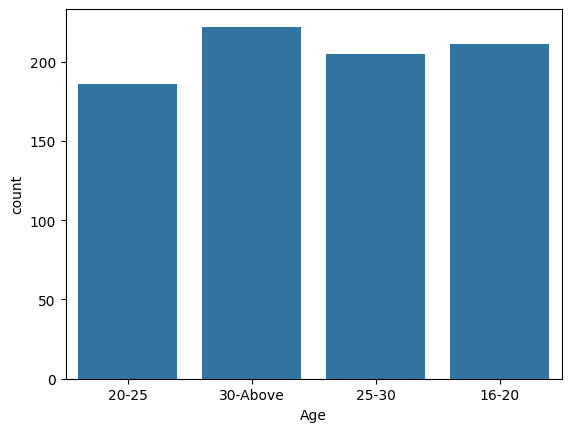

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
age_=data["Age"].value_counts().reset_index()
print(age_)
sns.countplot(x=data["Age"])

## What is the gender distribution in the dataset?

   Gender  count
0  Female    434
1    Male    390


<Axes: xlabel='Gender', ylabel='Count'>

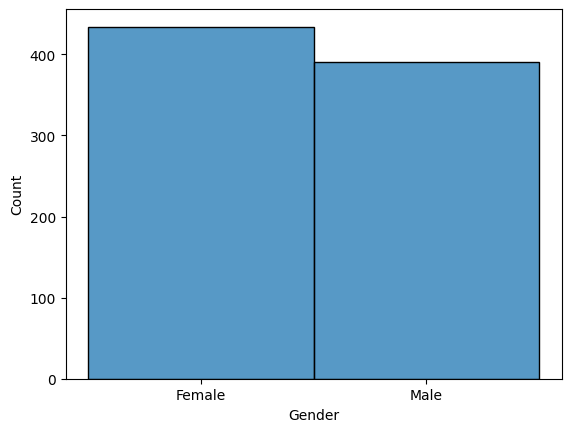

In [6]:
gen_=data["Gender"].value_counts().reset_index()
print(gen_)
sns.histplot(x=data["Gender"])

## What are the most common occupations in the dataset?

In [7]:
a=data["Occupation"].value_counts().reset_index()
a.head()

,Occupation,count
0,Housewife,185
1,Student,180
2,Corporate,159
3,Others,155
4,Business,145


# Quarantine and Lifestyle Changes

## How many days, on average, did people spend indoors?

In [10]:
data["Days_Indoors"].value_counts()

Days_Indoors
31-60 days            171
1-14 days             170
Go out Every day      168
More than 2 months    160
15-30 days            155
Name: count, dtype: int64

In [22]:
def process_indoors_day(x):
    if x == "31-60 days":
        return 45
    elif x == "1-14 days":
        return 7
    elif x == "15-30 days":
        return 22
    elif x== "Go out Every day":
        return 0
    else:
        return 75

data["Days_indoors_numeric"]= data["Days_Indoors"].apply(process_indoors_day)
data.head()

     
    

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,Days_indoors_numeric
0,20-25,Female,Corporate,1-14 days,Yes,Yes,No,Yes,True,Medium,No,No,Yes,7
1,30-Above,Male,Others,31-60 days,Yes,Yes,Maybe,No,False,High,No,No,Yes,45
2,30-Above,Female,Student,Go out Every day,No,No,Yes,No,False,Medium,Yes,Maybe,No,0
3,25-30,Male,Others,1-14 days,Yes,No,Maybe,No,False,Medium,No,Maybe,Yes,7
4,16-20,Female,Student,More than 2 months,Yes,Yes,Yes,No,True,Medium,Yes,Maybe,No,75


In [23]:
data["Days_indoors_numeric"].mean()

29.484223300970875

## What percentage of respondents reported growing stress due to quarantine?

In [26]:
yes_count= data.loc[data["Growing_Stress"] == "Yes"].shape[0]

In [27]:
total=data.shape[0]


In [28]:
percentage=(yes_count/total)*100
round(percentage,2)

36.53

## How many respondents reported changes in their habits during quarantine?

In [31]:
yes_count= data.loc[data["Changes_Habits"] == "Yes"].shape[0]

In [32]:
total=data.shape[0]

In [33]:
percentage=(yes_count/total)*100
round(percentage,2)

37.01

# Mental Health and Mood

## What percentage of respondents have a history of mental health issues?



In [11]:
yes_count= data.loc[data["Mental_Health_History"] == "Yes"].shape[0]

In [12]:
total=data.shape[0]

In [13]:
percentage=(yes_count/total)*100
round(percentage,2)

31.31

## How many respondents experienced weight changes during quarantine?

In [14]:
yes_count= data.loc[data["Weight_Change"] == "Yes"].shape[0]

In [15]:
total=data.shape[0]

In [16]:
percentage=(yes_count/total)*100
round(percentage,2)

32.52

## What is the distribution of mood swings among respondents?

  Mood_Swings  count
0      Medium    280
1         Low    278
2        High    266


<Axes: xlabel='Mood_Swings', ylabel='count'>

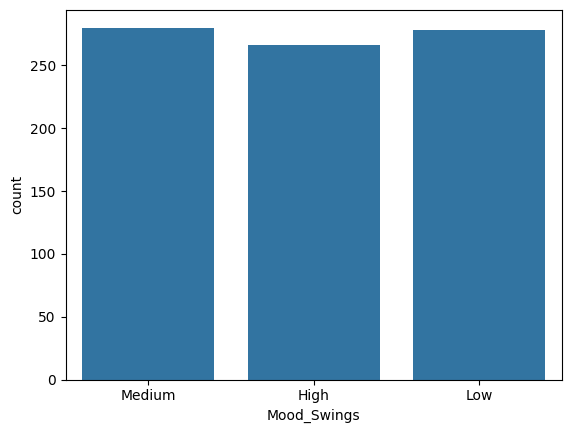

In [19]:
import seaborn as sns
mood_=data["Mood_Swings"].value_counts().reset_index()
print(mood_)
sns.countplot(x=data["Mood_Swings"])

# Correlation Analysis

## Is there a correlation between the number of days spent indoors and growing stress levels?



<function matplotlib.pyplot.show(close=None, block=None)>

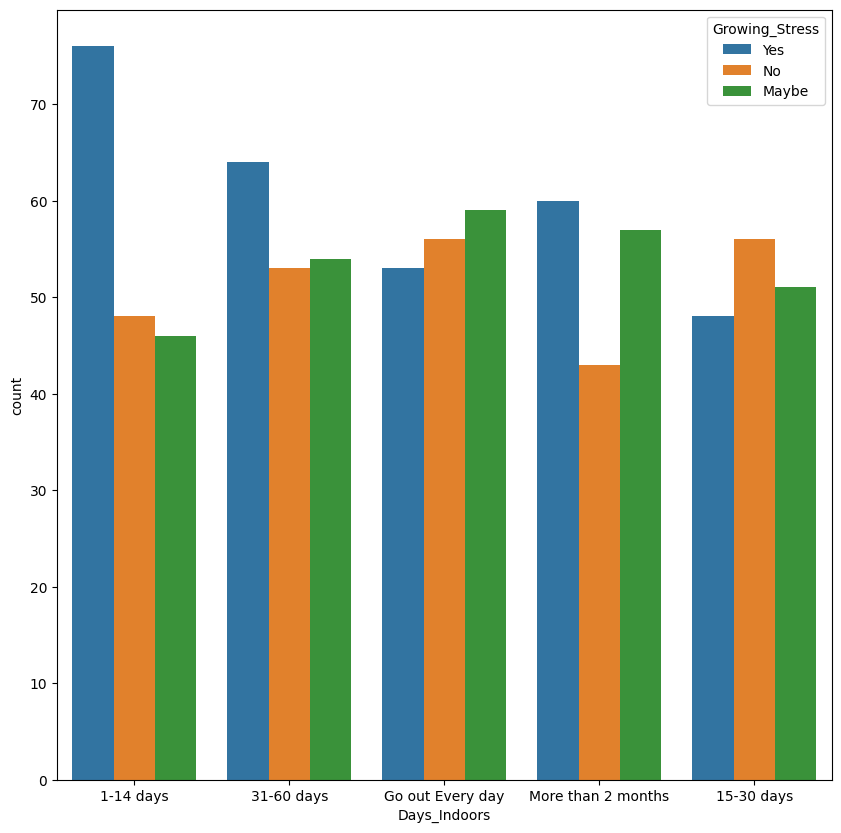

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.countplot(data=data,x="Days_Indoors",hue="Growing_Stress")
plt.show

## How does the occupation of respondents relate to their mental health history?

<Axes: xlabel='Occupation', ylabel='count'>

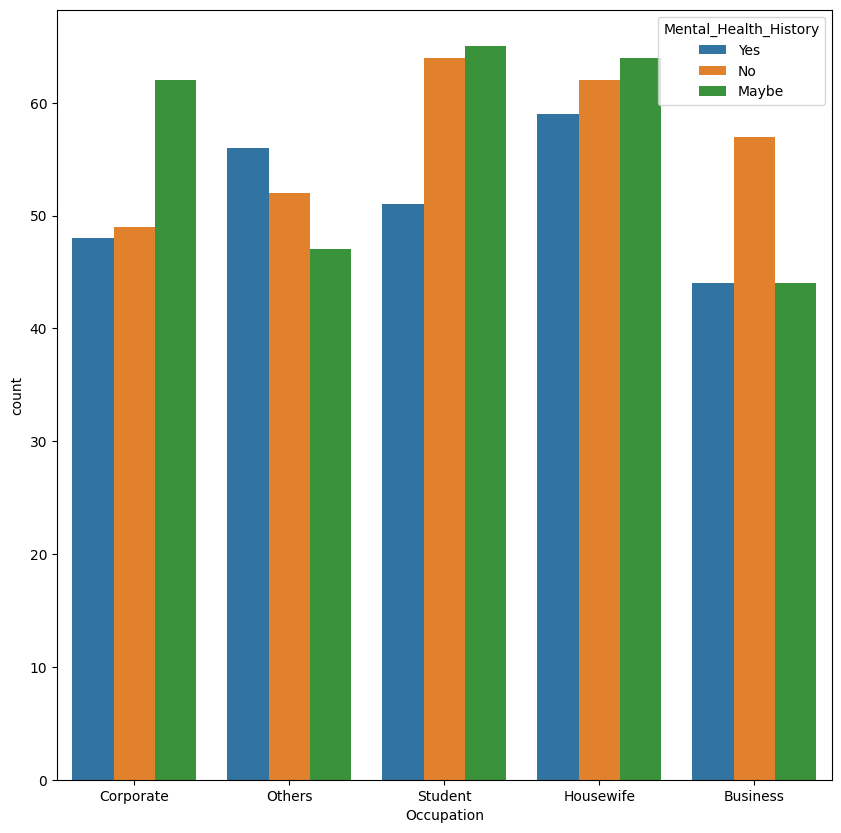

In [44]:
plt.figure(figsize=(10,10))
sns.countplot(data=data,x="Occupation",hue="Mental_Health_History")

## Is there a relationship between age groups and weight change?

<Axes: xlabel='Age', ylabel='count'>

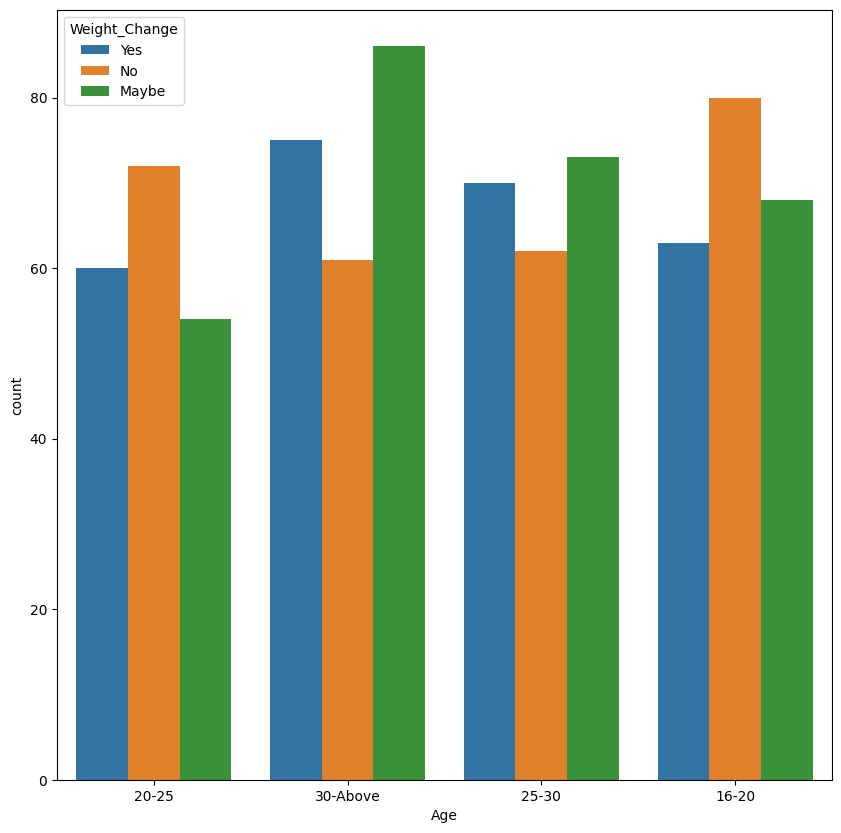

In [45]:
plt.figure(figsize=(10,10))
sns.countplot(data=data,x="Age",hue="Weight_Change")

# Group Comparisons

## Compare the mental health history between males and females. Are there significant differences?



<Axes: xlabel='Mental_Health_History', ylabel='count'>

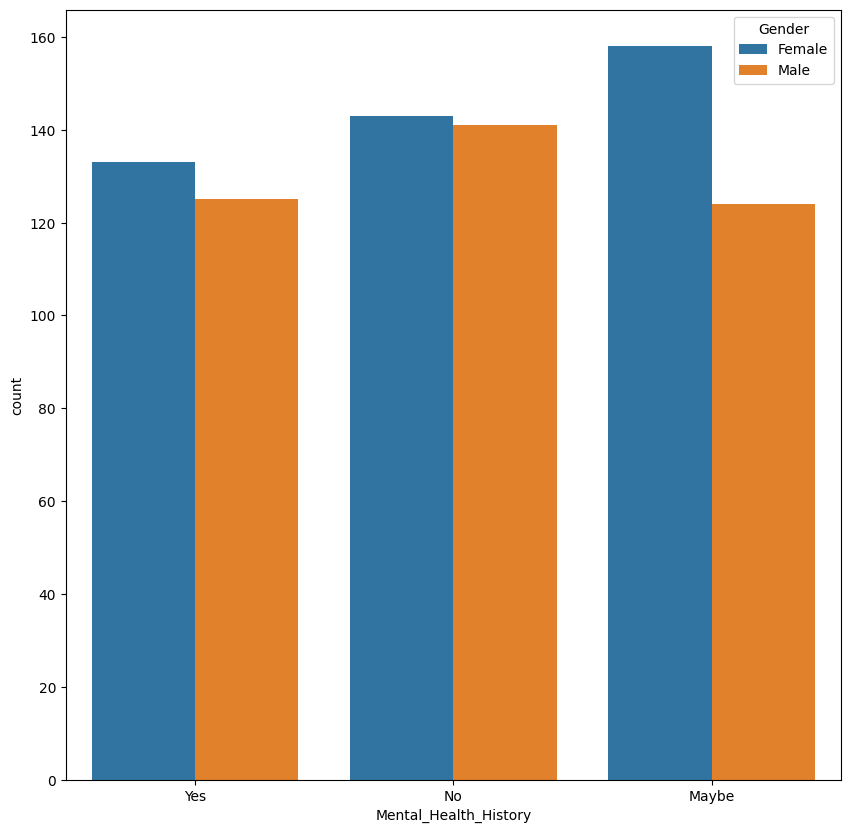

In [49]:
plt.figure(figsize=(10,10))
sns.countplot(data=data,x="Mood_Swings",hue="Gender")

## How do mood swings vary across different occupations?

<Axes: xlabel='Mental_Health_History', ylabel='count'>

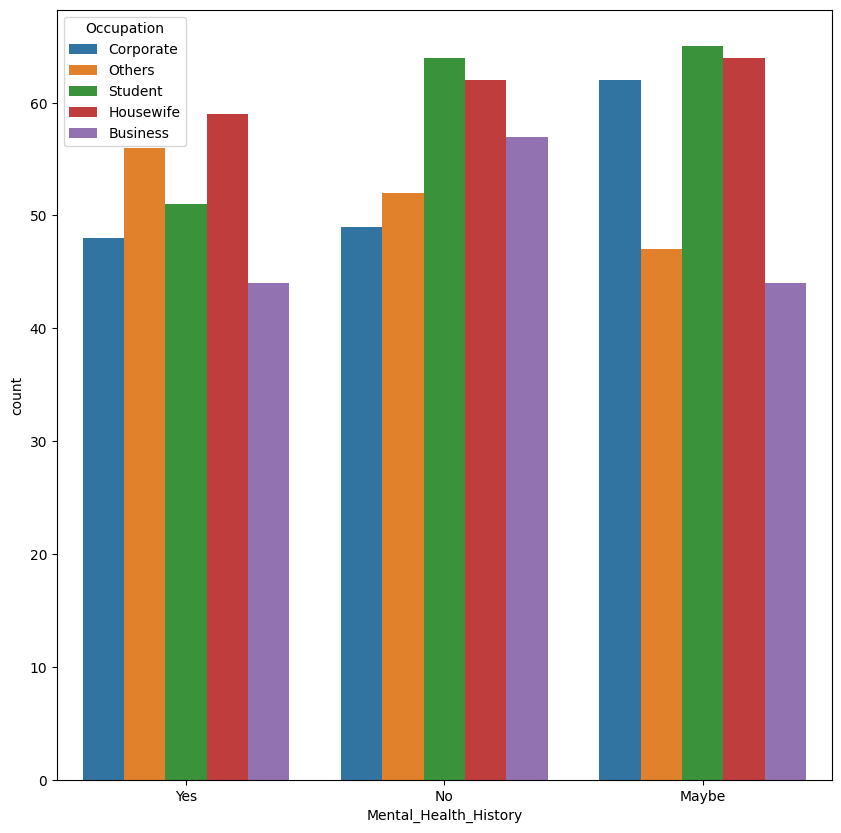

In [52]:
plt.figure(figsize=(10,10))
sns.countplot(data=data,x="Mental_Health_History",hue="Occupation")

## Analyze the stress levels among different age groups.

<Axes: xlabel='Growing_Stress', ylabel='count'>

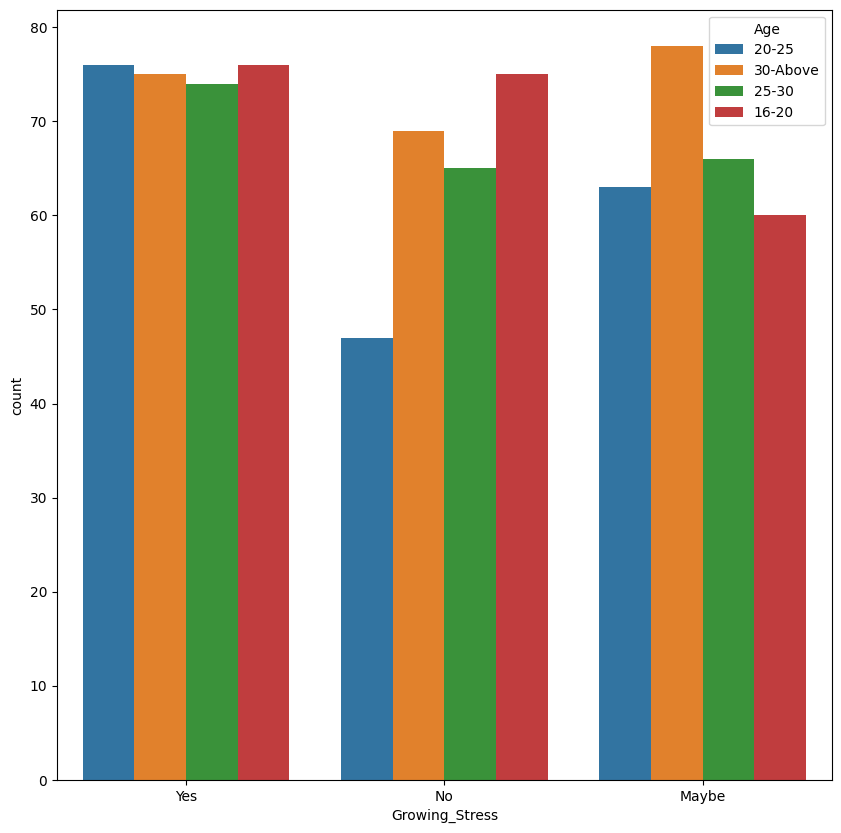

In [53]:
plt.figure(figsize=(10,10))
sns.countplot(data=data,x="Growing_Stress",hue="Age")

# Impact of Quarantine


## How does the duration of time spent indoors affect quarantine frustrations and changes in habits?



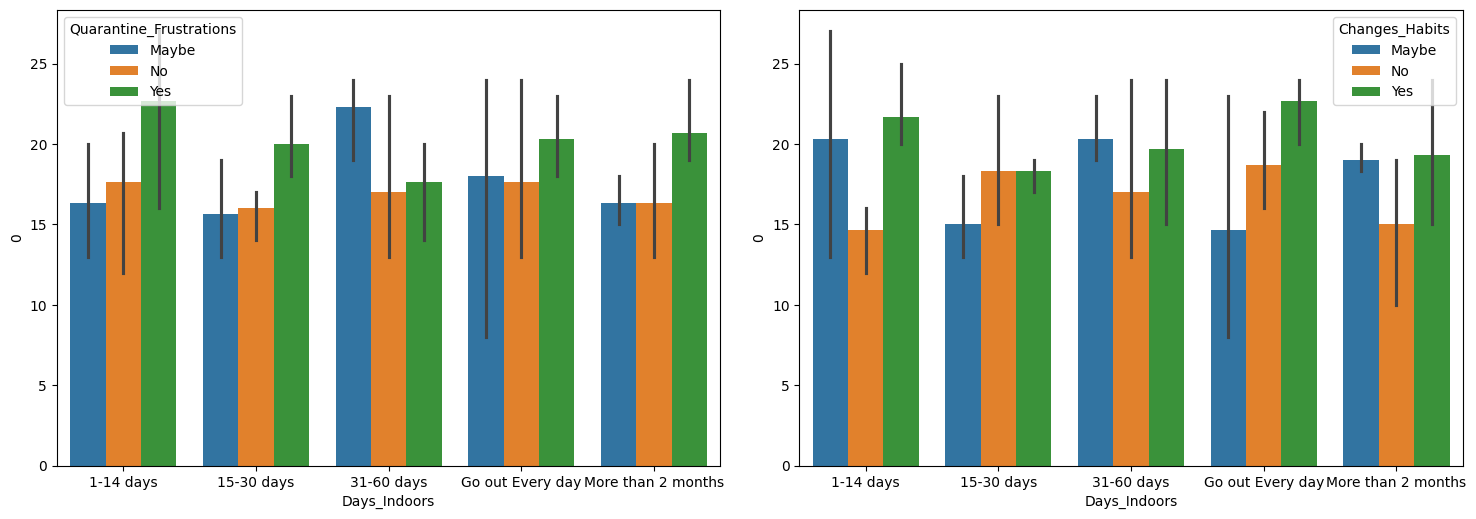

In [74]:
df=data.groupby(["Days_Indoors","Quarantine_Frustrations","Changes_Habits"]).size().reset_index()
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.barplot(data=df,x="Days_Indoors",y=0,hue="Quarantine_Frustrations")

plt.subplot(2,2,2)
sns.barplot(data=df,x="Days_Indoors",y=0,hue="Changes_Habits")

plt.tight_layout()
plt.show()

## What is the impact of quarantine on mental health across different demographic groups?


<Axes: xlabel='Mental_Health_History', ylabel='count'>

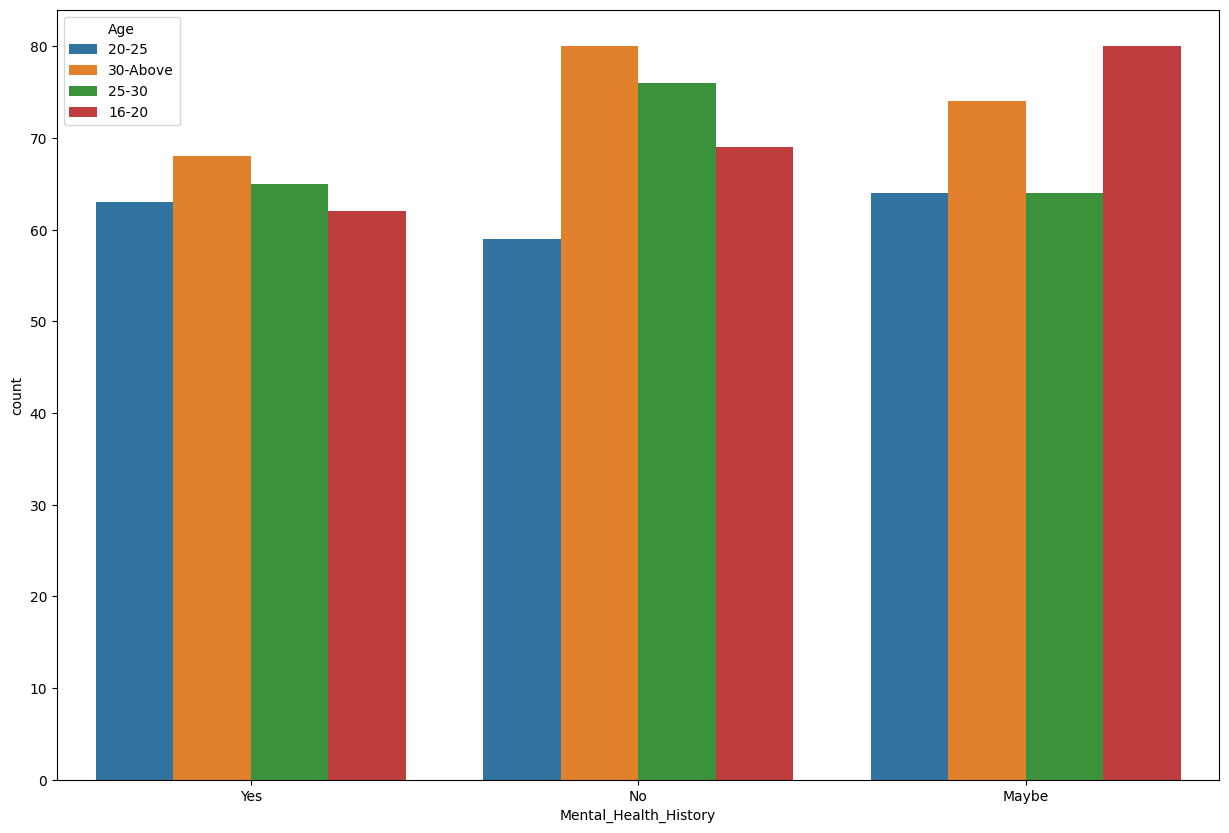

In [92]:
plt.figure(figsize=(15,10))
sns.countplot(data=data,x="Mental_Health_History",hue="Age")

## Investigate the relationship between quarantine frustrations and mood swings.

<Axes: xlabel='Quarantine_Frustrations', ylabel='count'>

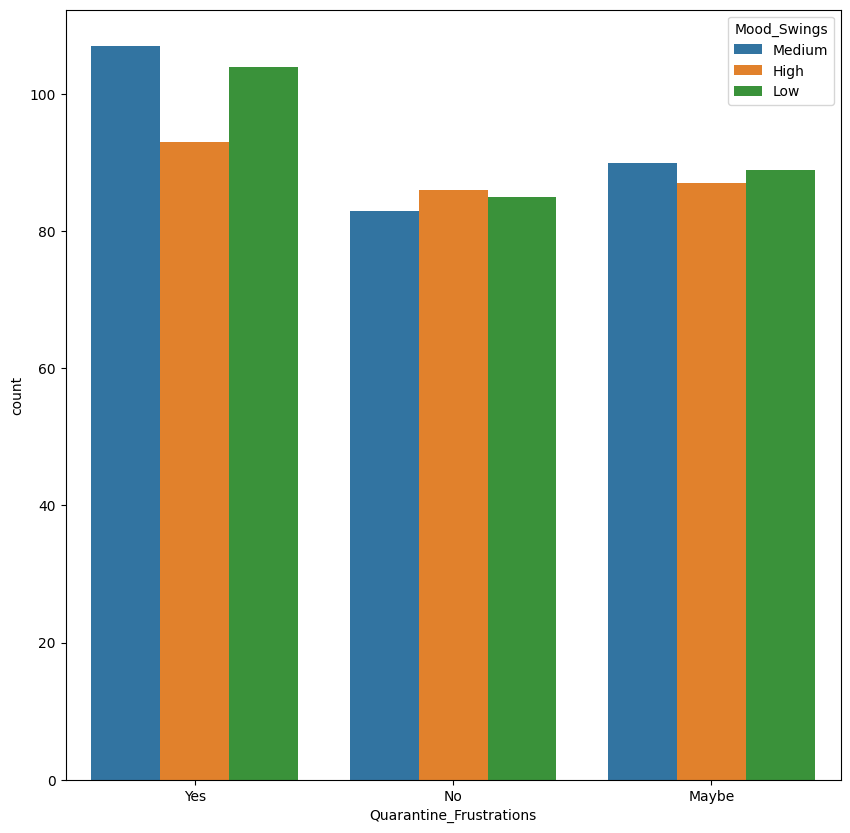

In [93]:
plt.figure(figsize=(10,10))
sns.countplot(data=data,x="Quarantine_Frustrations",hue="Mood_Swings")

# Predictive Analysis:



## What factors contribute most to growing stress during quarantine?

In [80]:
data.head()

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
0,20-25,Female,Corporate,1-14 days,Yes,Yes,No,Yes,Yes,Medium,No,No,Yes
1,30-Above,Male,Others,31-60 days,Yes,Yes,Maybe,No,No,High,No,No,Yes
2,30-Above,Female,Student,Go out Every day,No,No,Yes,No,No,Medium,Yes,Maybe,No
3,25-30,Male,Others,1-14 days,Yes,No,Maybe,No,Maybe,Medium,No,Maybe,Yes
4,16-20,Female,Student,More than 2 months,Yes,Yes,Yes,No,Yes,Medium,Yes,Maybe,No


C:\Users\shesa\AppData\Local\Temp\ipykernel_7220\3140186510.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data.loc[data["Growing_Stress"] == "Yes"],x=i, palette="cool")


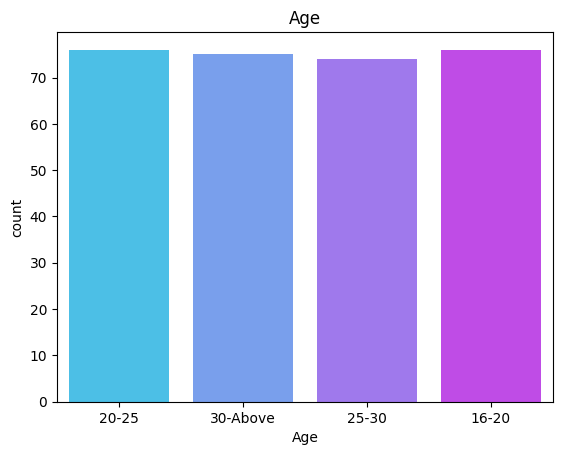

C:\Users\shesa\AppData\Local\Temp\ipykernel_7220\3140186510.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data.loc[data["Growing_Stress"] == "Yes"],x=i, palette="cool")


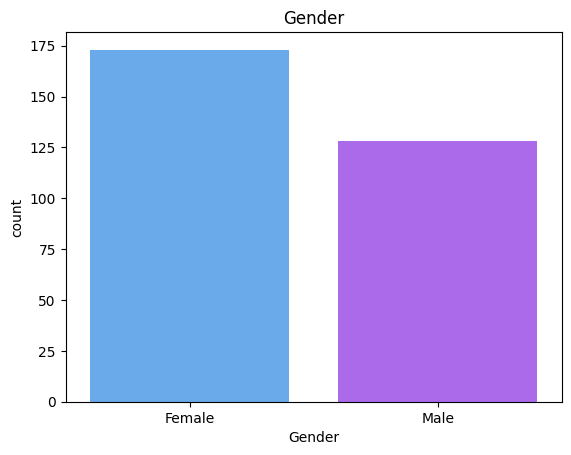

C:\Users\shesa\AppData\Local\Temp\ipykernel_7220\3140186510.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data.loc[data["Growing_Stress"] == "Yes"],x=i, palette="cool")


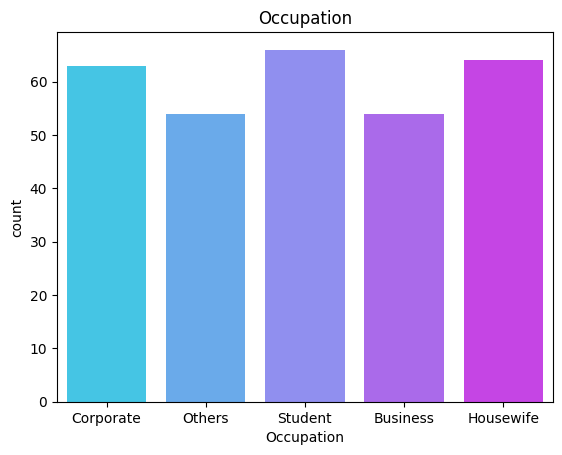

C:\Users\shesa\AppData\Local\Temp\ipykernel_7220\3140186510.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data.loc[data["Growing_Stress"] == "Yes"],x=i, palette="cool")


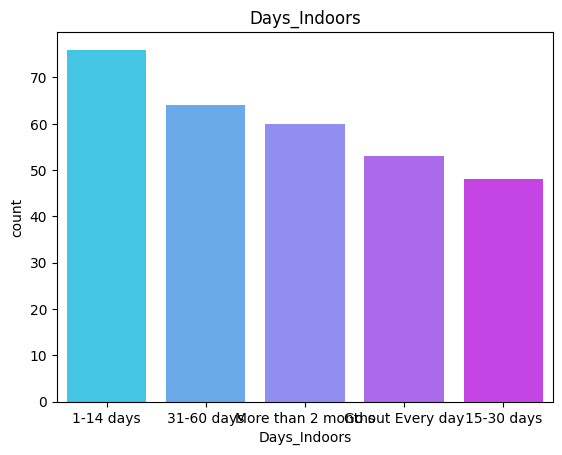

C:\Users\shesa\AppData\Local\Temp\ipykernel_7220\3140186510.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data.loc[data["Growing_Stress"] == "Yes"],x=i, palette="cool")


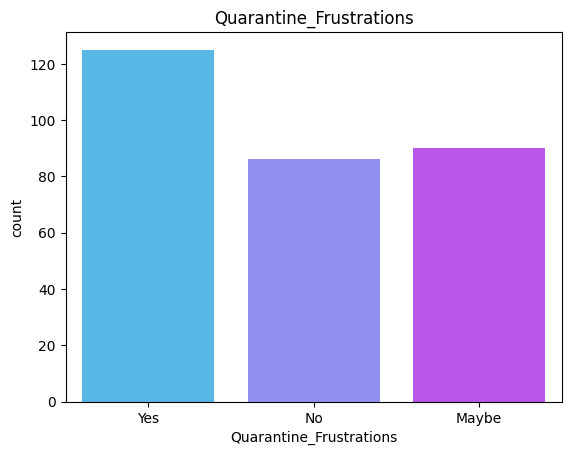

C:\Users\shesa\AppData\Local\Temp\ipykernel_7220\3140186510.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data.loc[data["Growing_Stress"] == "Yes"],x=i, palette="cool")


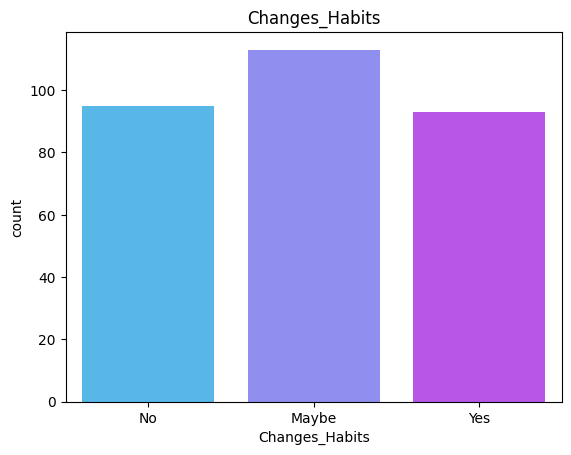

C:\Users\shesa\AppData\Local\Temp\ipykernel_7220\3140186510.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data.loc[data["Growing_Stress"] == "Yes"],x=i, palette="cool")


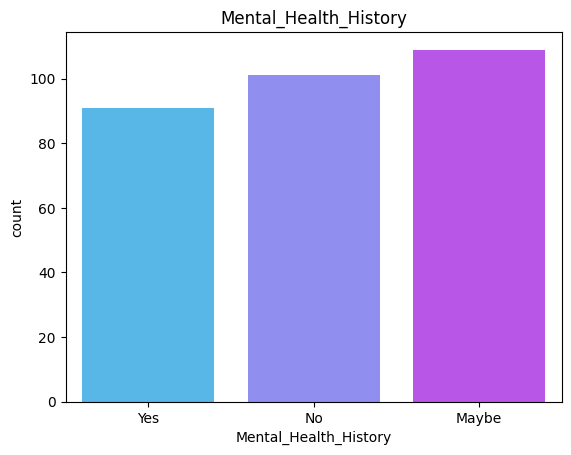

C:\Users\shesa\AppData\Local\Temp\ipykernel_7220\3140186510.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data.loc[data["Growing_Stress"] == "Yes"],x=i, palette="cool")


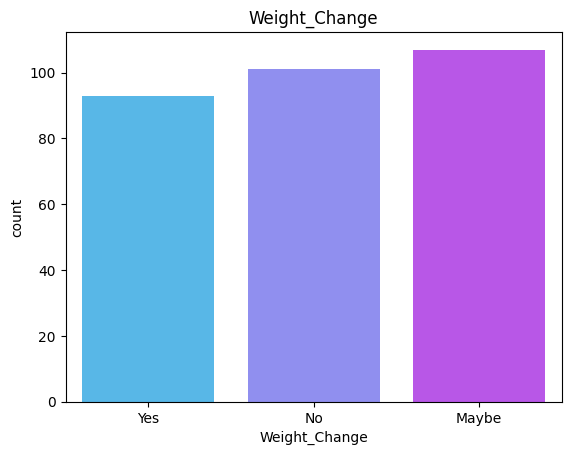

C:\Users\shesa\AppData\Local\Temp\ipykernel_7220\3140186510.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data.loc[data["Growing_Stress"] == "Yes"],x=i, palette="cool")


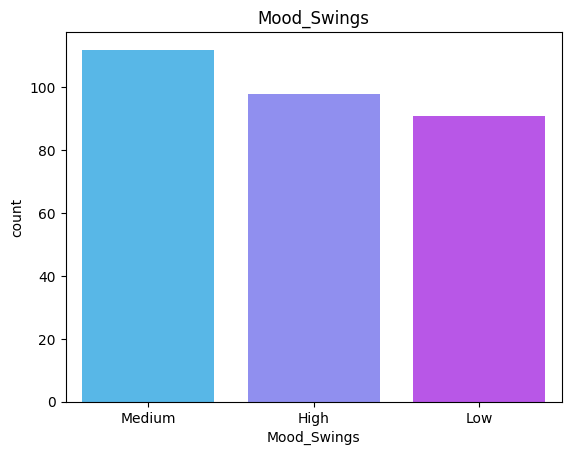

C:\Users\shesa\AppData\Local\Temp\ipykernel_7220\3140186510.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data.loc[data["Growing_Stress"] == "Yes"],x=i, palette="cool")


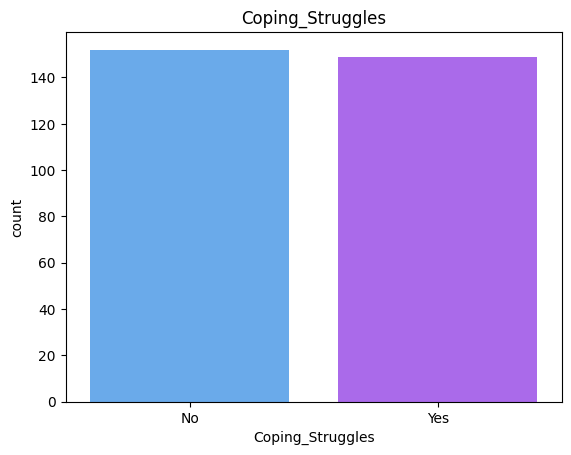

C:\Users\shesa\AppData\Local\Temp\ipykernel_7220\3140186510.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data.loc[data["Growing_Stress"] == "Yes"],x=i, palette="cool")


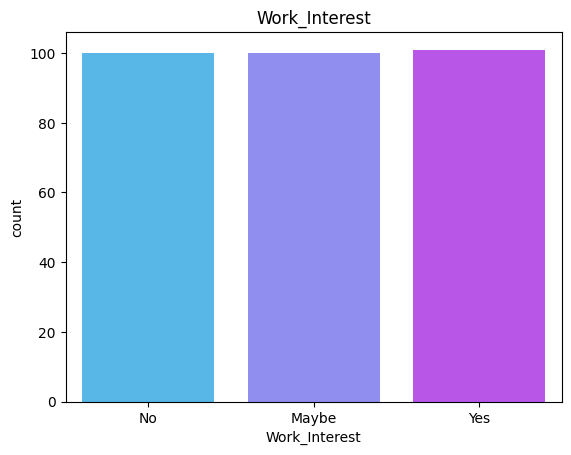

C:\Users\shesa\AppData\Local\Temp\ipykernel_7220\3140186510.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data.loc[data["Growing_Stress"] == "Yes"],x=i, palette="cool")


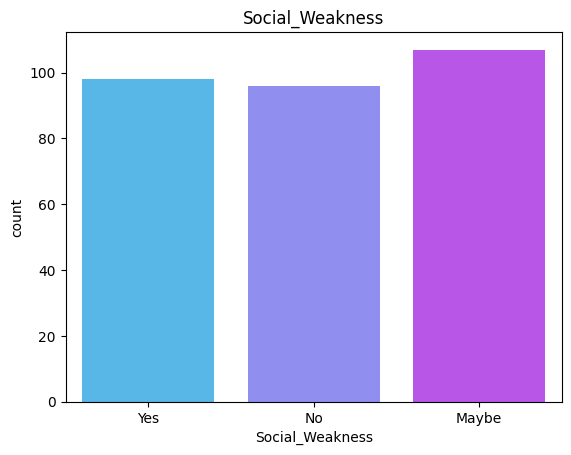

In [89]:
for i in data.loc[data["Growing_Stress"] == "Yes"].columns:
    if i != "Growing_Stress":
        plt.figure()
        sns.countplot(data.loc[data["Growing_Stress"] == "Yes"],x=i, palette="cool")
        plt.title(i)
        plt.show()